# Analysis of Antibiotics Prescription and Hospitalisation Risk

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import os
import glob
%matplotlib inline

In [2]:
#read csv.gz files and concatenate them
#path2 = os.getcwd()+'\output\measures'
path1 = r'C:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit\output\measures'
all_files = glob.glob(os.path.join(path1, "*.csv.gz"))
print(path1)

data = pd.concat((pd.read_csv(f) for f in all_files))
data

C:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit\output\measures


,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,sgss_positive,covrx1_dat,covrx2_dat,died_date,uti_date_1,...,lrti_counts,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id
0,NaN,2019-12,NaN,2018-01,NaN,NaN,NaN,NaN,2021-04-16,NaN,...,0,0,0,0,0,0,0,0,0,9098
1,2013-04,NaN,NaN,2018-12,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,6,4,0,0,0,5,1730
2,2012-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,3,5020
3,2017-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,0,0,0,0,0,0,0,0,4014
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,0,0,0,5,0,0,0,9561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,6,0,0,0,0,5583
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,3116
997,NaN,NaN,NaN,NaN,NaN,2019-09-13,NaN,NaN,NaN,NaN,...,5,0,5,0,6,0,0,0,0,528
998,2016-08,NaN,NaN,NaN,2018-10,NaN,NaN,NaN,2021-03-23,NaN,...,0,0,0,6,0,0,0,0,3,2135


In [3]:
data.columns

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'sgss_positive', 'covrx1_dat', 'covrx2_dat',
       'died_date', 'uti_date_1', 'uti_date_2', 'uti_date_3', 'uti_date_4',
       'lrti_date_1', 'lrti_date_2', 'lrti_date_3', 'lrti_date_4', 'age',
       'age_cat', 'sex', 'practice', 'region', 'msoa', 'imd', 'bmi',
       'ethnicity', 'smoking_status', 'gp_count', 'flu_vaccine_tpp',
       'flu_vaccine', 'antibacterial_prescriptions',
       'broad_spectrum_antibiotics_prescriptions', 'primary_care_covid',
       'admitted', 'uti_counts', 'lrti_counts', 'uti_ab_count_1',
       'uti_ab_count_2', 'uti_ab_count_3', 'uti_ab_count_4', 'lrti_ab_count_1',
       'lrti_ab_count_2', 'lrti_ab_count_3', 'lrti_ab_count_4', 'patient_id'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   bmi_date_measured                         27234 non-null  object 
 1   smoking_status_date                       3400 non-null   object 
 2   most_recent_unclear_smoking_cat_date      3400 non-null   object 
 3   flu_vaccine_med                           3400 non-null   object 
 4   flu_vaccine_clinical                      3400 non-null   object 
 5   sgss_positive                             3400 non-null   object 
 6   covrx1_dat                                0 non-null      float64
 7   covrx2_dat                                0 non-null      float64
 8   died_date                                 3400 non-null   object 
 9   uti_date_1                                3400 non-null   object 
 10  uti_date_2                          

In [5]:
data.describe(include='all')

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,sgss_positive,covrx1_dat,covrx2_dat,died_date,uti_date_1,...,lrti_counts,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id
count,27234,3400,3400,3400,3400,3400,0.0,0.0,3400,3400,...,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000
unique,141,34,34,13,7,978,NaN,NaN,428,983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-08,2021-03,2019-06,2018-01,2018-10,2020-11-06,NaN,NaN,2021-10-12,2019-02-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,239,118,120,319,581,10,NaN,NaN,40,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.901882,0.900176,0.901765,0.898853,0.898824,0.899559,0.898294,0.898676,0.904029,5009.150206
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.863268,1.859844,1.861083,1.857707,1.857128,1.857841,1.854135,1.856716,1.865534,2875.661756
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2507.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5034.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7502.000000


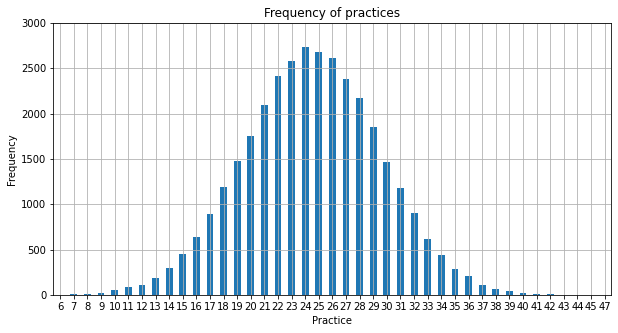

In [6]:
#data['practice'].value_counts().sort_index()

data['practice'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel('Practice')
plt.ylabel('Frequency')
plt.title('Frequency of practices')
#plt.xlim(0, 100)
plt.ylim(0, 3000)
plt.grid()
#plt.savefig(r'output/hospitalisation_risk/practices.png', edgecolor='none')
plt.show()

F    17334
M    16666
Name: sex, dtype: int64


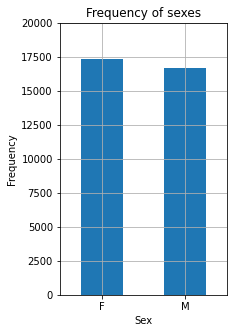

In [7]:
#data['sex'].value_counts().sort_index()

data['sex'].value_counts().sort_index().plot(kind='bar', figsize=(3, 5), rot=0)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Frequency of sexes')
#plt.xlim(0, 100)
plt.ylim(0, 20000)
plt.grid()
print(data['sex'].value_counts().sort_index())
#plt.savefig(r'output/hospitalisation_risk/sexes.png', edgecolor='none')
plt.show()

0-4      4077
15-24    3799
25-34    3824
35-44    3708
45-54    3809
5-14     3674
55-64    3749
65-74    3667
75+      3693
Name: age_cat, dtype: int64


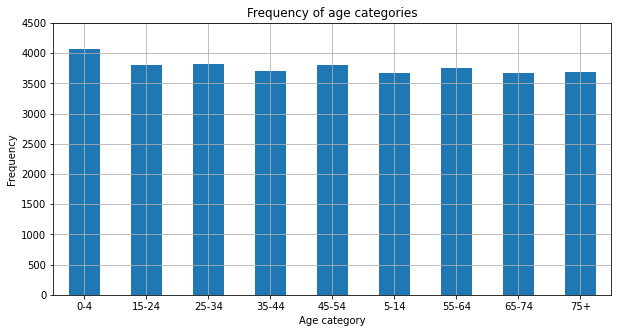

In [8]:
#data['age_cat'].value_counts().sort_index()

data['age_cat'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel('Age category')
plt.ylabel('Frequency')
plt.title('Frequency of age categories')
#plt.xlim(0, 100)
plt.ylim(0, 4500)
plt.grid()
print(data['age_cat'].value_counts().sort_index())
#plt.savefig(r'output/hospitalisation_risk/age_categories.png', edgecolor='none')
plt.show()

C:\Users\m84300af\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


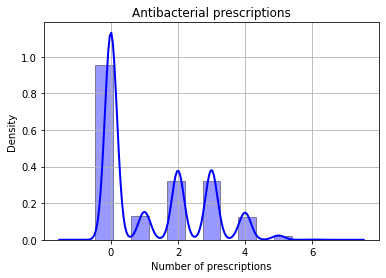

In [9]:
sns.distplot(data['antibacterial_prescriptions'], hist=True, kde=True, 
             bins=15, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.xlabel('Number of prescriptions')
#plt.ylabel('Frequency')
plt.title('Antibacterial prescriptions')
#plt.xlim(0, 100)
#plt.ylim(0, 1100)
plt.grid(True)
#plt.savefig(r'output/hospitalisation_risk/antibacterial_prescirption.png', edgecolor='none')
plt.show()